Title -

Time Series Analysisa. Checking Stationary
b. Converting a non-stationary data to stationary
c. Implementing Dickey Fuller Test
d. Plot ACF and PACF
e. Generating the ARIMA plot
f. TSA Forecasting

Time Series Analysis (TSA) is a specialized branch of statistics and data analysis that deals with data points collected over time, such as stock prices, temperature readings, or monthly sales. The main goal of TSA is to understand the underlying patterns, trends, and seasonality in the data and make predictions for future values. The provided Python code demonstrates various techniques and steps involved in TSA, including checking stationarity, transforming data to stationary, implementing statistical tests, and generating forecasts using ARIMA models.

a. Checking Stationarity:
Stationarity is a critical assumption in time series analysis, where the statistical properties of the data remain constant over time. The check_stationary function utilizes the Augmented Dickey-Fuller (ADF) test to determine whether the time series is stationary or not. The ADF test calculates the ADF statistic and its associated p-value. If the p-value is less than a significance level (usually 0.05), we can reject the null hypothesis and consider the series as stationary.

b. Converting a Non-stationary Data to Stationary:
When the time series is not stationary, it needs to be transformed to satisfy the stationarity assumption. The make_stationary function applies differencing to the original series, creating a new series where each data point represents the difference between consecutive observations. Differencing helps remove trends and make the data stationary.

c. Implementing Dickey-Fuller Test:
The Dickey-Fuller test is a statistical test used to determine the presence of unit roots in a time series, which indicates non-stationarity. The test is implemented using the adfuller function from the statsmodels library, which returns the ADF statistic, p-value, and critical values. By comparing the p-value with the significance level, we can infer stationarity.

d. Plot ACF and PACF:
The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots help in identifying the order of the autoregressive (AR) and moving average (MA) components of the ARIMA model. The plot_acf and plot_pacf functions from statsmodels.graphics.tsaplots library generate these plots, showing the correlation between the time series and its lags.

e. Generating the ARIMA Plot:
The ARIMA (AutoRegressive Integrated Moving Average) model is a popular time series forecasting method that combines the AR and MA components. The auto_arima function from the pmdarima library automatically selects the optimal (p, d, q) values for the ARIMA model based on the Akaike Information Criterion (AIC) score. The selected model is then used to generate forecasts.

f. TSA Forecasting:
After fitting the ARIMA model to the stationary time series, the model_fit object contains the fitted values. The forecast method is used to generate future predictions. By specifying the number of steps to forecast, the model predicts future data points, allowing us to make time series forecasts.

Time Series Analysis plays a crucial role in various real-world applications, including finance, economics, and environmental sciences. By understanding the underlying patterns and making accurate forecasts, TSA enables data-driven decision-making and enhances our ability to respond to changing trends and patterns over time. The provided Python code demonstrates the fundamental steps of TSA, from checking stationarity to generating ARIMA forecasts, providing a practical example for analyzing time series data and making predictions in diverse domains.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Air Passengers dataset
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0, parse_dates=True)

In [ ]:
series.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
def check_stationary(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationary(series)

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
def make_stationary(series):
    stationary_series = series.diff().dropna()
    return stationary_series

stationary_series = make_stationary(series)

In [ ]:
check_stationary(stationary_series)

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


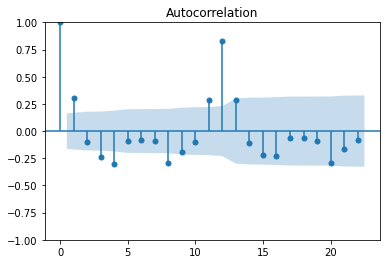

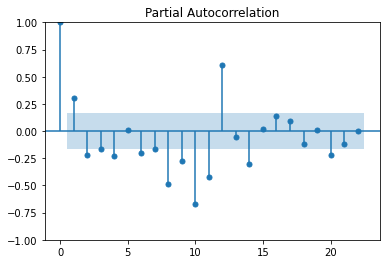

In [ ]:
plot_acf(stationary_series)
plot_pacf(stationary_series)
plt.show()

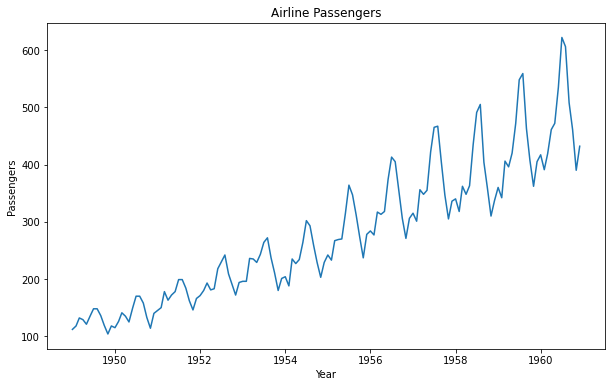

In [ ]:
#Plot the original time series:

plt.figure(figsize=(10, 6))
plt.plot(series.index, series["Passengers"])
plt.title("Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

In [ ]:
import pmdarima as pm

auto_model = pm.auto_arima(series, seasonal=False, stepwise=True,
                           suppress_warnings=True, trace=True,
                           error_action='ignore', information_criterion='aic')

print("Optimal (p, d, q) values:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

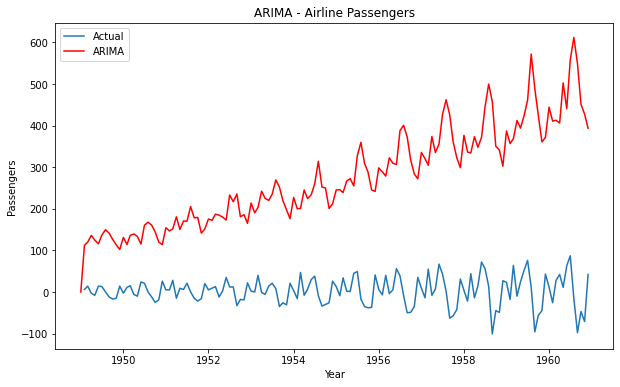

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(4, 1, 3))
model_fit = model.fit()

# Plot the stationary series and fitted values
plt.figure(figsize=(10, 6))
plt.plot(stationary_series, label="Actual")
plt.plot(model_fit.fittedvalues, color='red', label="ARIMA")
plt.title("ARIMA - Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=10)  # Replace 'steps' with the number of steps you want to forecast
print("Forecasted values:\n", forecast)

Forecasted values:
 1961-01-01    467.573764
1961-02-01    490.494491
1961-03-01    509.136872
1961-04-01    492.554716
1961-05-01    495.305955
1961-06-01    475.947810
1961-07-01    476.339851
1961-08-01    475.552143
1961-09-01    472.353811
1961-10-01    483.889652
Freq: MS, Name: predicted_mean, dtype: float64
